## Troisième Partie :Traitement_avec_technique_recente




#### Importation des Packages

In [1]:
# Importation des bibliothèques nécessaires
import pandas as pd # Pour la manipulation de données sous forme de DataFrames.
import numpy as np # Pour les opérations numériques et la manipulation de tableaux.
import matplotlib.pyplot as plt # Pour la création de graphiques et de visualisations.
import seaborn as sns # Pour des visualisations statistiques.
import cv2 # (OpenCV) : Pour le traitement d'images.
import time # Pour la mesure du temps d'exécution.
import os #  Pour les opérations liées au système d'exploitation.

# Bibliothèque pour la barre de progression
from tqdm import tqdm # Pour une barre de progression lors du traitement de boucles.

# Importation des modules de scikit-learn pour la préparation des données et l'évaluation
from sklearn.model_selection import train_test_split # Pour diviser les données en ensembles d'entraînement et de test.
from sklearn import preprocessing, metrics # Pour la préparation des données, Pour les métriques d'évaluation.

# Importation de TensorFlow et Keras
import tensorflow as tf  # La bibliothèque principale pour le deep learning.
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, GlobalAveragePooling1D, Flatten, Dense, Dropout 
from tensorflow.keras.layers import Rescaling, RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.utils import to_categorical # Pour convertir des étiquettes en encodage one-hot.

# Autres importations
import random # Pour la génération de nombres aléatoires.
import shutil  # Pour les opérations de manipulation de fichiers et de répertoires.

# Désactivation des avertissements
import warnings # Pour la gestion des avertissements.
warnings.filterwarnings("ignore")

2023-10-04 10:52:34.404490: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


#### Chargement des datasets
Nous allons importer l'ensemble des jeux de données afin de visualiser leurs principales informations :

In [3]:
# Lecture du fichier CSV 'my_df.csv' et stockage des données dans un DataFrame (df)
df = pd.read_csv('my_df.csv')
# Affichage du DataFrame (df)
df

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,...,product_rating,overall_rating,brand,product_specifications,categorie,categorie2,res,clean_description,res_clean,labels
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Curtains & Accessories,230,key feature elegance polyester multicolor abst...,152,4
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",Baby Care,Baby Bath & Skin,74,specification sathiyas cotton bath towel bath ...,62,0
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",Baby Care,Baby Bath & Skin,215,key feature eurospa cotton terry face towel se...,154,0
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Bed Linen,145,key feature santosh royal fashion cotton print...,114,4
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",Home Furnishing,Bed Linen,214,key feature jaipur print cotton floral king si...,153,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88ZGTX65GH4V,1399.0,999.0,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,...,No rating available,No rating available,Oren Empower,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care,Baby & Kids Gifts,431,oren empower extra large self adhesive sticker...,226,0
1046,fd6cbcc22efb6b761bd564c28928483c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEC889ZD5GDCVQ,4930.0,1896.0,fd6cbcc22efb6b761bd564c28928483c.jpg,False,...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care,Baby & Kids Gifts,303,wallmantra large vinyl sticker sticker pack pr...,154,0
1047,5912e037d12774bb73a2048f35a00009,2015-12-01 10:15:43 +0000,http://www.flipkart.com/uberlyfe-extra-large-p...,Uberlyfe Extra Large Pigmented Polyvinyl Films...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE5UVGW2JWVWCT,4500.0,1449.0,5912e037d12774bb73a2048f35a00

In [4]:
# Définition du répertoire contenant les images
path = "./Images/"
# Création d'une liste contenant le nom de tous les fichiers dans le répertoire path
list_photos = [file for file in os.listdir(path)]
# Affichage du nombre de fichiers dans le répertoire
print(len(list_photos))
# Lecture des données depuis un fichier CSV
df = pd.read_csv("./flipkart_com-ecommerce_sample_1050.csv")
# Extraction des colonnes 'image' et 'product_category_tree' du DataFrame df
data = df[['image','product_category_tree']]

1051


In [5]:
def recup_cat(liste_cat):
    """
    Renvoie la liste des catégories de liste_cat sans crochets ni apostrohes.
    Ainsi que la liste des différentes catégories.
    """
# Initialisation de deux listes vides pour stocker les catégories nettoyées et les catégories uniques
    liste = []
    l_cat = []
# Parcours de chaque élément (category) de la liste liste_cat
    for category in liste_cat:
# Divise la chaîne de caractères category en utilisant ">>" comme séparateur et prend la première partie
        category = category.split(">>")[0]
# Supprime les guillemets doubles, les apostrophes et les crochets de la catégorie
        category = category.replace('"','').replace("'","").replace('[','')
# Supprime le dernier caractère (qui semble être un espace vide) de la catégorie
        category = category[:-1]
# Ajoute la catégorie nettoyée à la liste liste
        liste.append(category)
# Si la catégorie n'est pas déjà dans la liste des catégories uniques (l_cat), l'ajoute
        if category not in(l_cat):
            l_cat.append(category)
# Renvoie les deux listes : liste des catégories nettoyées et liste des catégories uniques
    return liste, l_cat

In [6]:
# Appel de la fonction recup_cat avec la colonne 'product_category_tree' de data comme argument
categories, l_cat = recup_cat(data['product_category_tree'])

In [7]:
# Mettre à jour la colonne 'label_name' de data avec la liste 'categories'
data['label_name'] = categories
# Sélectionner les colonnes 'image' et 'label_name' de data et mettre à jour le DataFrame data avec ces colonnes sélectionnées
data = data[['image','label_name']]
# Affiche les cinq premières lignes du DataFrame data
data.head()

,image,label_name
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Home Furnishing
1,7b72c92c2f6c40268628ec5f14c6d590.jpg,Baby Care
2,64d5d4a258243731dc7bbb1eef49ad74.jpg,Baby Care
3,d4684dcdc759dd9cdf41504698d737d8.jpg,Home Furnishing
4,6325b6870c54cd47be6ebfbffa620ec7.jpg,Home Furnishing
...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc.jpg,Baby Care
1046,fd6cbcc22efb6b761bd564c28928483c.jpg,Baby Care
1047,5912e037d12774bb73a2048f35a00009.jpg,Baby Care
1048,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,Baby Care


In [8]:
# Création d'une instance de LabelEncoder
le = preprocessing.LabelEncoder()
# Utilisation de LabelEncoder pour encoder la colonne 'label_name' de data
data["label"] = le.fit_transform(data["label_name"])
# Affichage des cinq premières lignes du DataFrame mis à jour
data.head()

,image,label_name,label
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Home Furnishing,4
1,7b72c92c2f6c40268628ec5f14c6d590.jpg,Baby Care,0
2,64d5d4a258243731dc7bbb1eef49ad74.jpg,Baby Care,0
3,d4684dcdc759dd9cdf41504698d737d8.jpg,Home Furnishing,4
4,6325b6870c54cd47be6ebfbffa620ec7.jpg,Home Furnishing,4
...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc.jpg,Baby Care,0
1046,fd6cbcc22efb6b761bd564c28928483c.jpg,Baby Care,0
1047,5912e037d12774bb73a2048f35a00009.jpg,Baby Care,0
1048,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,Baby Care,0


In [9]:
le.classes_

array(['Baby Care', 'Beauty and Personal Care', 'Computers',
       'Home Decor & Festive Needs', 'Home Furnishing',
       'Kitchen & Dining', 'Watches'], dtype=object)

In [10]:
def create_model_fct() :
    # Récupération du modèle pré-entraîné VGG16 avec les poids du modèle imagenet
    model0 = VGG16(include_top=False, weights="imagenet", input_shape=(224, 224, 3))

    # Rendre les couches du modèle VGG16 non entraînables (fixer les poids)
    for layer in model0.layers:
        layer.trainable = False

    # Récupération de la sortie du modèle VGG16
    x = model0.output
    # Ajout de couches supplémentaires au modèle
    x = GlobalAveragePooling2D()(x) # Couche de pooling global
    x = Dense(256, activation='relu')(x) # Couche dense avec activation ReLU
    x = Dropout(0.5)(x) # Couche de dropout pour la régularisation
    predictions = Dense(7, activation='softmax')(x) # Couche de sortie pour la classification (7 classes)

    # Définition du nouveau modèle en spécifiant les entrées et les sorties
    model = Model(inputs=model0.input, outputs=predictions)
   # Compilation du modèle avec la fonction de perte, l'optimiseur et les métriques
    model.compile(loss="categorical_crossentropy", optimizer='rmsprop', metrics=["accuracy"])
   # Afficher un résumé du modèle, y compris les couches et le nombre de paramètres
    print(model.summary())
   # Retourne le modèle créé 
    return model

In [11]:
# Divise les données en ensembles d'entraînement et de test
data_train, data_test = train_test_split(data, stratify=data['label'], test_size=0.2, random_state=0)
# Affiche la forme (nombre de lignes et de colonnes) de l'ensemble d'entraînement
data_train.shape

(840, 3)

### Approche nouvelle par Dataset sans data augmentation

In [12]:
# Crée un dossier appelé 'photos_train' pour stocker les données d'entraînement
os.mkdir('./photos_train')

# Importe la bibliothèque shutil pour manipuler les fichiers et les répertoires
import shutil
# Pour chaque classe (catégorie) dans la liste l_cat
for classe in l_cat:
    # Crée un dossier pour la classe, en utilisant son nom
    path_classe = './photos_train/class_'+classe+'/'
    os.mkdir(path_classe)
    
    # Crée une liste des noms de fichiers image appartenant à la classe actuelle
    l_images = data_train.loc[data_train["label_name"]==classe, 'image']
    
    # Définit le chemin complet du dossier de destination
    destination_path = path_classe
    # Pour chaque nom de fichier image dans la liste l_images
    for image in l_images :
        # Définit le chemin complet de l'image source à copier
        source_path = './Images/'+image
    
       # Copie l'image depuis le répertoire source vers le dossier de destination
        shutil.copy(source_path, destination_path)

In [13]:
# Crée un dossier appelé 'photos_test' pour stocker les données de test
os.mkdir('./photos_test')
# Pour chaque classe (catégorie) dans la liste l_cat
for classe in l_cat:
   # Crée un dossier pour la classe, en utilisant son nom
    path_classe = './photos_test/class_'+classe+'/'
    os.mkdir(path_classe)
    
   # Crée une liste des noms de fichiers image appartenant à la classe actuelle
    l_images = data_test.loc[data_test["label_name"]==classe, 'image']
    
   # Définit le chemin complet du dossier de destination
    destination_path = path_classe
   # Pour chaque nom de fichier image dans la liste l_images 
    for image in l_images :
        # Définit le chemin complet de l'image source à copier
        source_path = './Images/'+image
    
       # Copie l'image depuis le répertoire source vers le dossier de destination
        shutil.copy(source_path, destination_path)

In [14]:
# Définit la taille de lot (batch_size) à 32
batch_size = 32
# Définit la fonction dataset_fct qui prend en entrée plusieurs paramètres
def dataset_fct(path, validation_split=0, data_type=None, data=data) :
    # Utilise la fonction image_dataset_from_directory de TensorFlow pour créer le dataset
    dataset = tf.keras.utils.image_dataset_from_directory(
                    path, batch_size=32, image_size=(224, 224), shuffle=True, seed=42,
                    validation_split=validation_split, subset=data_type
                    )
     # Retourne le dataset créé
    return dataset

In [15]:
# Définit les chemins des répertoires de données d'entraînement et de test
chemin_train = './photos_train/'
chemin_test = './photos_test/'
# Crée un ensemble de données pour l'entraînement en utilisant la fonction dataset_fct
# avec une fraction de validation de 25% et en spécifiant le type de données "training"
dataset_train = dataset_fct(chemin_train, validation_split=0.25, data_type='training', data = data_train)

# Crée un ensemble de données pour la validation en utilisant la fonction dataset_fct
# avec une fraction de validation de 25% et en spécifiant le type de données "validation"
dataset_val = dataset_fct(chemin_train, validation_split=0.25, data_type='validation', data = data_train)

# Crée un ensemble de données pour les tests en utilisant la fonction dataset_fct
# avec aucune validation (validation_split=0) et en ne spécifiant pas de type de données (data_type=None)
dataset_test = dataset_fct(chemin_test, validation_split=0, data_type=None, data = data_test)

Found 840 files belonging to 7 classes.
Using 630 files for training.
Found 840 files belonging to 7 classes.
Using 210 files for validation.
Found 210 files belonging to 7 classes.


In [16]:
# Crée un modèle en utilisant la fonction create_model_fct
model1 = create_model_fct()

# Définit le chemin de sauvegarde pour les meilleurs poids du modèle
model1_save_path = "./model1_best_weights.h5"
# Crée un callback ModelCheckpoint pour sauvegarder les meilleurs poids du modèle
checkpoint = ModelCheckpoint(model1_save_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
# Crée un callback EarlyStopping pour arrêter l'entraînement prématurément en cas de stagnation
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
# Crée une liste de callbacks à utiliser pendant l'entraînement du modèle
callbacks_list = [checkpoint, es]

58889256/58889256 [==============================] - 3s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [17]:
# Compile le modèle en spécifiant les paramètres d'optimisation, de perte et de métriques
model1.compile(optimizer='adam', # Algorithme d'optimisation Adam
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # Fonction de perte
              metrics=['accuracy']) # Métriques à suivre pendant l'entraînement (précision dans ce cas)

In [18]:
# Enregistre le temps de début de l'entraînement
temps1 = time.time()
# Démarre l'entraînement du modèle en utilisant la fonction fit
history1 = model1.fit(dataset_train, validation_data=dataset_val,
                    batch_size=batch_size, epochs=20, callbacks=callbacks_list, verbose=1)
# Calculer la durée totale de l'entraînement en soustrayant le temps de fin (time.time()) du temps de début (temps1).
# La différence est stockée dans la variable duration1
duration1=time.time()-temps1
# Afficher la durée totale de l'entraînement en secondes avec une mise en forme spécifique.
# Le temps est affiché avec deux décimales de précision.
print("temps de T-SNE : ", "%15.2f" % duration1, "secondes")

2023-10-04 11:10:18.340893: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [630]
	 [[{{node Placeholder/_0}}]]
2023-10-04 11:10:18.341997: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [630]
	 [[{{node Placeholder/_4}}]]


Epoch 1/20
20/20 [==============================] - ETA: 0s - loss: 6.6385 - accuracy: 0.4254

2023-10-04 11:13:32.582116: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [210]
	 [[{{node Placeholder/_4}}]]
2023-10-04 11:13:32.582622: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [210]
	 [[{{node Placeholder/_4}}]]



Epoch 1: val_loss improved from inf to 1.72190, saving model to ./model1_best_weights.h5
20/20 [==============================] - 255s 13s/step - loss: 6.6385 - accuracy: 0.4254 - val_loss: 1.7219 - val_accuracy: 0.7762
Epoch 2/20
20/20 [==============================] - ETA: 0s - loss: 2.4530 - accuracy: 0.6921
Epoch 2: val_loss improved from 1.72190 to 1.47558, saving model to ./model1_best_weights.h5
20/20 [==============================] - 237s 12s/step - loss: 2.4530 - accuracy: 0.6921 - val_loss: 1.4756 - val_accuracy: 0.7619
Epoch 3/20
20/20 [==============================] - ETA: 0s - loss: 1.6067 - accuracy: 0.7651
Epoch 3: val_loss improved from 1.47558 to 1.20358, saving model to ./model1_best_weights.h5
20/20 [==============================] - 242s 12s/step - loss: 1.6067 - accuracy: 0.7651 - val_loss: 1.2036 - val_accuracy: 0.7952
Epoch 4/20
20/20 [==============================] - ETA: 0s - loss: 1.0565 - accuracy: 0.7857
Epoch 4: val_loss improved from 1.20358 to 1.1538

In [19]:
# Évaluer la perte et la précision sur l'ensemble de données d'entraînement
loss1_train, accuracy1_train = model1.evaluate(dataset_train, verbose=True)
# Évaluer la perte et la précision sur l'ensemble de données de validation
loss1_val, accuracy1_val = model1.evaluate(dataset_val, verbose=True)

7/7 [==============================] - 65s 9s/step - loss: 0.9105 - accuracy: 0.7952


In [21]:
pip install plot_keras_history

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.5/322.5 kB 2.9 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for plot_keras_history: filename=plot_keras_history-1.1.38-py3-none-any.whl size=9458 sha256=70b5422dc6f84776cdcdd7f0895b7fc8c87e6672442c821d9cc7b8801a91b290
  Stored in directory: /Users/admin/Library/Caches/pip/wheels/df/78/47/2cdf4aaece3ee5e198bf085b56e5f7980306bf5aec4616f5c1
  Created wheel for sanitize_ml_labels: filename=sanitize_ml_labels-1.0.51-py3-none-any.whl size=321865 sha256=2cd752351dfa00296a3df71513abd6f657516e0b041f95d0c61fee6f82e7817f
  Stored in directory: /Users/admin/Library/Caches/pip/wheels/12/f9/a0/1b22139ced1d8dd9aec7e82e43937197b9d86ed4716822982d
  Created wheel for support_developer: filename=support_developer-1.0.5-py3-none-any.whl size=5630 sha256=fc1cd5ff29162634e5619b221de7e33d53b8d40c786ef8

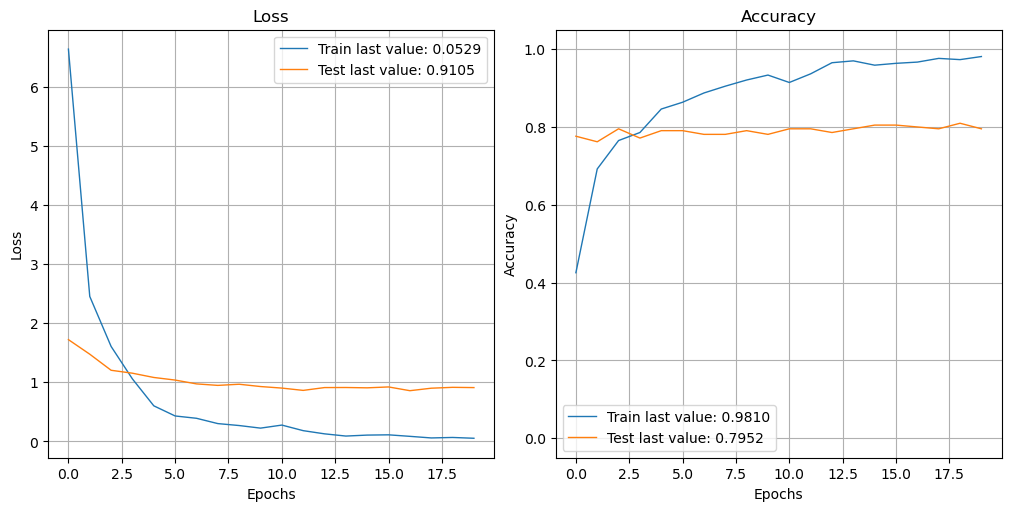

In [22]:
from plot_keras_history import show_history, plot_history

# Afficher l'historique d'entraînement nommé "history1"
show_history(history1)
# Créer un graphique de l'historique d'entraînement nommé "history1" et l'enregistrer sous le nom "standard.png"
plot_history(history1, path="standard.png")
# Fermer le graphique
plt.close()

In [23]:
# Crée deux listes vides pour stocker les étiquettes prédites et les vraies étiquettes
predicted_labels = []
true_labels = []

# Parcourt les données de validation dans dataset_val
for images, labels in dataset_val:
    # Fait des prédictions pour le lot d'images en utilisant le modèle
    predicted_labels_batch = model1.predict(images)
    
    # Ajoute les étiquettes prédites à la liste predicted_labels
    # En utilisant np.argmax, on obtient l'indice de la classe prédite avec la plus haute probabilité
    predicted_labels += list(np.argmax(predicted_labels_batch, axis=1))
    # Ajoute les vraies étiquettes (labels) à la liste true_labels
    true_labels += list(labels.numpy())
print(true_labels)
print()
print(predicted_labels)

1/1 [==============================] - 5s 5s/step
[5, 6, 4, 5, 6, 2, 3, 5, 0, 5, 0, 1, 0, 5, 2, 3, 4, 3, 3, 2, 5, 1, 4, 1, 5, 4, 5, 5, 4, 0, 6, 2, 3, 1, 3, 1, 0, 0, 4, 3, 5, 0, 5, 6, 3, 2, 2, 2, 3, 2, 3, 0, 2, 4, 6, 6, 3, 0, 0, 6, 5, 4, 5, 2, 1, 0, 2, 5, 6, 0, 4, 0, 2, 2, 5, 0, 1, 1, 1, 5, 5, 3, 2, 3, 5, 2, 1, 1, 5, 4, 5, 5, 3, 5, 6, 2, 1, 1, 4, 5, 2, 1, 0, 4, 6, 4, 0, 4, 3, 2, 4, 4, 2, 5, 1, 3, 0, 1, 4, 4, 6, 3, 1, 1, 0, 2, 3, 2, 0, 1, 5, 6, 0, 6, 0, 4, 1, 3, 4, 5, 3, 3, 2, 5, 4, 3, 5, 3, 6, 3, 5, 5, 1, 0, 0, 6, 3, 4, 6, 5, 6, 5, 6, 1, 0, 3, 4, 3, 0, 4, 6, 6, 5, 2, 4, 4, 2, 1, 6, 2, 6, 5, 0, 6, 1, 0, 1, 4, 5, 2, 3, 3, 4, 3, 6, 6, 6, 4, 6, 0, 6, 4, 6, 3, 3, 1, 5, 3, 5, 3]

[5, 6, 4, 5, 6, 2, 3, 5, 4, 5, 0, 0, 0, 5, 2, 3, 0, 3, 3, 2, 5, 1, 4, 1, 5, 4, 5, 5, 1, 0, 6, 2, 3, 1, 3, 1, 3, 0, 4, 3, 5, 0, 5, 6, 5, 2, 2, 2, 6, 2, 3, 4, 2, 4, 6, 6, 3, 0, 4, 6, 5, 4, 5, 2, 5, 0, 2, 5, 6, 0, 4, 4, 1, 2, 2, 0, 1, 3, 3, 5, 5, 5, 2, 3, 0, 2, 1, 1, 5, 4, 5, 5, 0, 5, 1, 4, 1, 1, 4, 5, 2, 1, 0, 4, 6, 4,

In [24]:
# Calcul de la matrice de confusion
conf_mat = metrics.confusion_matrix(true_labels, predicted_labels)
# Affichage de la matrice de confusion
print(conf_mat)
# Génération et affichage du rapport de classification
print(metrics.classification_report(true_labels, predicted_labels))

[[19  0  0  2  7  0  0]
 [ 2 19  1  2  0  2  0]
 [ 0  2 23  0  1  0  0]
 [ 2  3  1 22  0  5  1]
 [ 3  1  1  1 24  0  0]
 [ 1  1  2  0  0 33  0]
 [ 0  1  0  1  0  0 27]]
              precision    recall  f1-score   support

           0       0.70      0.68      0.69        28
           1       0.70      0.73      0.72        26
           2       0.82      0.88      0.85        26
           3       0.79      0.65      0.71        34
           4       0.75      0.80      0.77        30
           5       0.82      0.89      0.86        37
           6       0.96      0.93      0.95        29

    accuracy                           0.80       210
   macro avg       0.79      0.79      0.79       210
weighted avg       0.80      0.80      0.79       210



<Axes: >

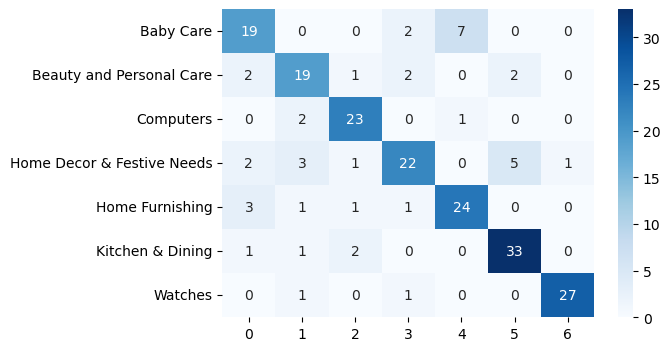

In [25]:
# Définition des noms de classe pour chaque catégorie
class_names = ['Baby Care', 'Beauty and Personal Care', 'Computers', 'Home Decor & Festive Needs',
             'Home Furnishing', 'Kitchen & Dining', 'Watches']

# Création d'un DataFrame pandas à partir de la matrice de confusion avec des étiquettes pour les lignes et les colonnes
df_cm = pd.DataFrame(conf_mat, index = [label for label in class_names],
                  columns = [i for i in "0123456"])
# Création d'une figure pour afficher la heatmap avec une taille spécifiée
plt.figure(figsize = (6,4))
# Création de la heatmap à partir du DataFrame, en ajoutant des annotations (valeurs) et en utilisant une palette de couleurs "Blues"
sns.heatmap(df_cm, annot=True, cmap="Blues")

### Approche nouvelle par Dataset avec data augmentation intégrée au modèle

In [26]:
def create_model_fct2() :
     # Data augmentation
    data_augmentation = Sequential([
        RandomFlip("horizontal", input_shape=(224, 224, 3)),
        RandomRotation(0.1),
        RandomZoom(0.1)
      ])
    
    # Récupération du modèle pré-entraîné (VGG16)
    model_base = VGG16(include_top=False, weights="imagenet", input_shape=(224, 224, 3))
    for layer in model_base.layers:
        layer.trainable = False

    # Définition du nouveau modèle
    model = Sequential([
                data_augmentation, # Augmentation des données pour améliorer la généralisation
                Rescaling(1./127.5, offset=-1), # Normalisation des valeurs de pixel
                model_base, # Utilisation du modèle VGG16 pré-entraîné comme base
                GlobalAveragePooling2D(), # Réduction des dimensions en utilisant la moyenne globale
                Dense(256, activation='relu'),  # Couche dense avec activation ReLU
                Dropout(0.5), # Couche de dropout pour régularisation
                Dense(7, activation='softmax')  # Couche de sortie avec activation softmax pour classification multicatégorie
                ])

    # Compilation du modèle avec la fonction de perte, l'optimiseur et les métriques spécifiés
    model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
    # Affichage du résumé du modèle
    print(model.summary())
    #  Retourne le modèle final construit.
    return model

In [27]:
# Création du modèle en appelant la fonction create_model_fct2
model2 = create_model_fct2()

# Création du chemin pour sauvegarder les meilleurs poids du modèle
model2_save_path = "./model2_best_weights.h5"
# Création du callback ModelCheckpoint
checkpoint = ModelCheckpoint(model2_save_path,
                             monitor='val_loss',  # Métrique à surveiller (perte de validation)
                             verbose=1,  # Mode de comparaison pour l'arrêt anticipé (minimisation de la perte)
                             save_best_only=True, # Niveau de détail des messages (afficher des informations)
                             mode='min' # Nombre d'époques sans amélioration avant de s'arrêter
                            )
# Création de la liste de tous les callbacks
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
# Création de la liste de tous les callbacks
callbacks_list = [checkpoint, es]

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_1   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                      

In [28]:
# Mesure du temps de début de l'entraînement
temps2 = time.time()
# Entraînement du modèle avec les données d'entraînement et de validation
history2 = model2.fit(dataset_train,  # Ensemble d'entraînement
                    validation_data=dataset_val, # Ensemble de validation
                    batch_size=batch_size, # Taille des lots
                      epochs=35,  # Nombre d'époques (itérations sur l'ensemble d'entraînement complet)
                      callbacks=callbacks_list,  # Liste des callbacks à utiliser
                      verbose=1 # Niveau de détail des messages pendant l'entraînement
                     )
# Mesure du temps de fin de l'entraînement
duration2=time.time()-temps2
# Affichage du temps nécessaire pour l'entraînement
print("temps de T-SNE : ", "%15.2f" % duration2, "secondes")

Epoch 1/35
20/20 [==============================] - ETA: 0s - loss: 1.9294 - accuracy: 0.2317
Epoch 1: val_loss improved from inf to 1.41696, saving model to ./model2_best_weights.h5
20/20 [==============================] - 246s 12s/step - loss: 1.9294 - accuracy: 0.2317 - val_loss: 1.4170 - val_accuracy: 0.6524
Epoch 2/35
20/20 [==============================] - ETA: 0s - loss: 1.4457 - accuracy: 0.5111
Epoch 2: val_loss improved from 1.41696 to 1.10775, saving model to ./model2_best_weights.h5
20/20 [==============================] - 255s 13s/step - loss: 1.4457 - accuracy: 0.5111 - val_loss: 1.1077 - val_accuracy: 0.7333
Epoch 3/35
20/20 [==============================] - ETA: 0s - loss: 1.1665 - accuracy: 0.6476
Epoch 3: val_loss improved from 1.10775 to 0.89652, saving model to ./model2_best_weights.h5
20/20 [==============================] - 241s 12s/step - loss: 1.1665 - accuracy: 0.6476 - val_loss: 0.8965 - val_accuracy: 0.7857
Epoch 4/35
20/20 [==============================] 

In [29]:
# Évaluation de la perte et de l'exactitude sur l'ensemble d'entraînement
loss2_train, accuracy2_train = model2.evaluate(dataset_train, verbose=True)

# Évaluation de la perte et de l'exactitude sur l'ensemble de validation
loss2_val, accuracy2_val = model2.evaluate(dataset_val, verbose=True)

7/7 [==============================] - 69s 9s/step - loss: 0.5640 - accuracy: 0.8333


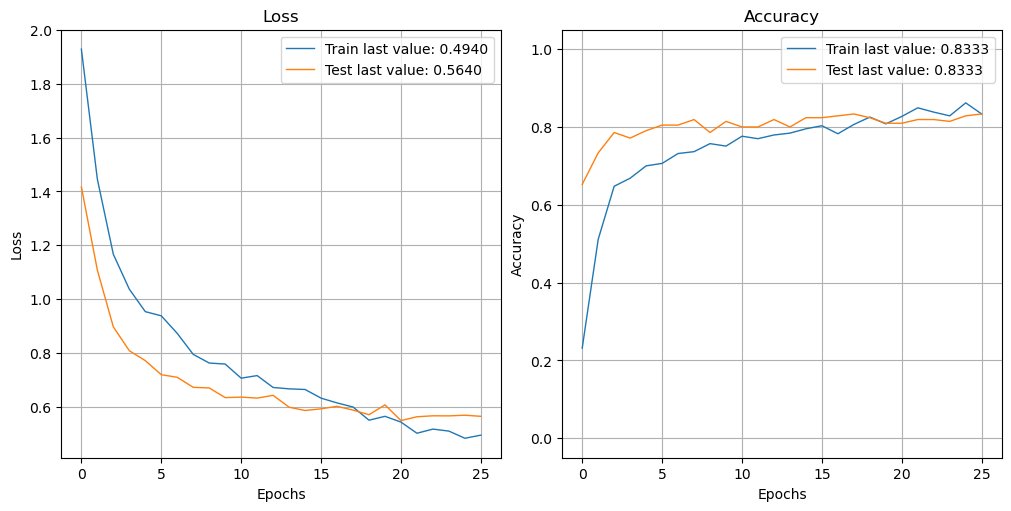

In [30]:
# Affiche l'historique d'entraînement avec la fonction show_history
show_history(history2)
# Génère un graphique de l'historique d'entraînement et le sauvegarde dans un fichier
plot_history(history2, path="standard.png")
# Ferme la fenêtre graphique
plt.close()

In [31]:
# Initialisation des listes pour les étiquettes prédites et réelles
predicted_labels = []
true_labels = []

# Boucle à travers les lots d'images et d'étiquettes dans l'ensemble de validation
for images, labels in dataset_val:
    # Fait des prédictions sur le lot d'images en utilisant le modèle
    predicted_labels_batch = model2.predict(images)
    
    # Ajoute les étiquettes prédites à la liste des étiquettes prédites
    predicted_labels += list(np.argmax(predicted_labels_batch, axis=1))
    
    # Ajoute les étiquettes réelles à la liste des étiquettes réelles (converties en tableau NumPy)
    true_labels += list(labels.numpy())
    
# Affiche les étiquettes réelles
print(true_labels)

# Affiche les étiquettes prédites
print()
print(predicted_labels)

1/1 [==============================] - 5s 5s/step
[2, 3, 3, 2, 1, 4, 4, 4, 1, 1, 5, 2, 5, 2, 3, 3, 4, 4, 4, 6, 3, 1, 4, 1, 2, 6, 0, 4, 5, 0, 0, 6, 0, 1, 1, 2, 6, 0, 3, 0, 0, 4, 5, 4, 2, 0, 6, 2, 2, 1, 2, 6, 1, 6, 1, 5, 3, 2, 4, 1, 2, 1, 3, 4, 0, 3, 6, 0, 4, 5, 0, 3, 3, 0, 3, 6, 0, 6, 3, 6, 3, 5, 2, 3, 3, 6, 4, 1, 4, 6, 3, 0, 1, 0, 5, 6, 5, 5, 1, 4, 5, 5, 6, 3, 3, 2, 1, 4, 6, 4, 3, 4, 1, 0, 0, 4, 1, 4, 5, 1, 2, 0, 5, 2, 1, 6, 3, 5, 0, 6, 6, 0, 5, 5, 6, 3, 5, 0, 3, 5, 3, 1, 6, 3, 5, 0, 5, 3, 5, 6, 0, 3, 2, 5, 1, 0, 6, 5, 4, 3, 0, 5, 5, 5, 1, 4, 6, 6, 6, 3, 6, 4, 5, 0, 0, 2, 2, 2, 0, 2, 2, 4, 2, 5, 5, 5, 5, 2, 3, 4, 5, 1, 6, 3, 3, 6, 3, 5, 4, 5, 2, 5, 4, 3, 2, 4, 1, 4, 1, 5]

[2, 3, 0, 2, 2, 4, 5, 4, 1, 1, 2, 2, 5, 2, 3, 3, 4, 4, 4, 6, 5, 0, 4, 4, 2, 6, 0, 5, 5, 4, 0, 6, 4, 1, 1, 1, 6, 0, 0, 4, 3, 4, 5, 2, 2, 0, 6, 2, 2, 1, 2, 6, 1, 6, 1, 5, 3, 2, 4, 1, 2, 1, 4, 4, 0, 3, 6, 0, 4, 5, 4, 2, 0, 0, 3, 6, 0, 6, 2, 6, 3, 5, 2, 3, 2, 6, 4, 1, 4, 6, 3, 0, 3, 0, 5, 6, 5, 5, 1, 4, 5, 5, 6, 3, 3, 2,

In [32]:
# Génère une matrice de confusion en comparant les étiquettes réelles aux étiquettes prédites
conf_mat = metrics.confusion_matrix(true_labels, predicted_labels)
# Affiche la matrice de confusion
print(conf_mat)
# Génère et affiche un rapport de classification
print(metrics.classification_report(true_labels, predicted_labels))

[[19  0  0  2  6  1  0]
 [ 1 20  2  1  2  0  0]
 [ 0  1 24  0  0  1  0]
 [ 3  1  3 22  1  3  1]
 [ 0  0  1  0 27  2  0]
 [ 0  0  3  0  0 34  0]
 [ 0  0  0  0  0  0 29]]
              precision    recall  f1-score   support

           0       0.83      0.68      0.75        28
           1       0.91      0.77      0.83        26
           2       0.73      0.92      0.81        26
           3       0.88      0.65      0.75        34
           4       0.75      0.90      0.82        30
           5       0.83      0.92      0.87        37
           6       0.97      1.00      0.98        29

    accuracy                           0.83       210
   macro avg       0.84      0.83      0.83       210
weighted avg       0.84      0.83      0.83       210



<Axes: >

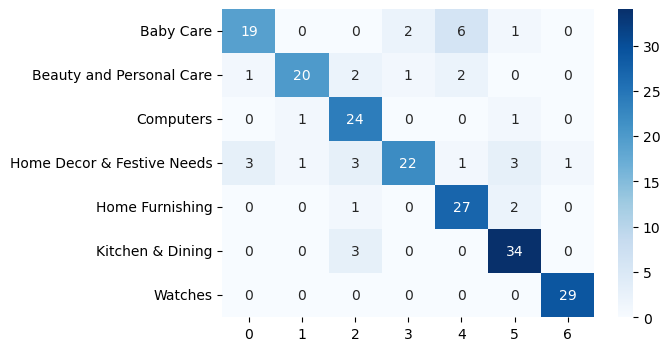

In [33]:
# Crée un DataFrame pandas à partir de la matrice de confusion avec des étiquettes d'index et de colonnes
df_cm = pd.DataFrame(conf_mat, index = [label for label in class_names],
                  columns = [i for i in "0123456"])

# Crée une figure matplotlib avec une taille spécifiée (6 pouces de largeur, 4 pouces de hauteur)
plt.figure(figsize = (6,4))
# Génère et affiche une heatmap à partir du DataFrame avec des annotations et une palette de couleurs "Blues"
sns.heatmap(df_cm, annot=True, cmap="Blues")

In [34]:
from sklearn.metrics.cluster import adjusted_rand_score
# Calcule le score d'ajustement Rand entre les étiquettes réelles et les étiquettes prédites
adjusted_rand_score(true_labels, predicted_labels)

0.6551618375974431